# TASK 2 
Wine Quality test using linear regression

In [1]:
# importing libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
# importing dataset 
wine_df = pd.read_csv('WineQT.csv', index_col= 'Id')

In [3]:
wine_df

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
Id,,,,,,,,,,,,
0,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5
1,7.8,0.880,0.00,2.6,0.098,25.0,67.0,0.99680,3.20,0.68,9.8,5
2,7.8,0.760,0.04,2.3,0.092,15.0,54.0,0.99700,3.26,0.65,9.8,5
3,11.2,0.280,0.56,1.9,0.075,17.0,60.0,0.99800,3.16,0.58,9.8,6
4,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5
...,...,...,...,...,...,...,...,...,...,...,...,...
1592,6.3,0.510,0.13,2.3,0.076,29.0,40.0,0.99574,3.42,0.75,11.0,6
1593,6.8,0.620,0.08,1.9,0.068,28.0,38.0,0.99651,3.42,0.82,9.5,6
1594,6.2,0.600,0.08,2.0,0.090,32.0,44.0,0.99490,3.45,0.58,10.5,5


In [4]:
wine_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1143 entries, 0 to 1597
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         1143 non-null   float64
 1   volatile acidity      1143 non-null   float64
 2   citric acid           1143 non-null   float64
 3   residual sugar        1143 non-null   float64
 4   chlorides             1143 non-null   float64
 5   free sulfur dioxide   1143 non-null   float64
 6   total sulfur dioxide  1143 non-null   float64
 7   density               1143 non-null   float64
 8   pH                    1143 non-null   float64
 9   sulphates             1143 non-null   float64
 10  alcohol               1143 non-null   float64
 11  quality               1143 non-null   int64  
dtypes: float64(11), int64(1)
memory usage: 116.1 KB


In [5]:
wine_df.describe()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
count,1143.000000,1143.000000,1143.000000,1143.000000,1143.000000,1143.000000,1143.000000,1143.000000,1143.000000,1143.000000,1143.000000,1143.000000
mean,8.311111,0.531339,0.268364,2.532152,0.086933,15.615486,45.914698,0.996730,3.311015,0.657708,10.442111,5.657043
std,1.747595,0.179633,0.196686,1.355917,0.047267,10.250486,32.782130,0.001925,0.156664,0.170399,1.082196,0.805824
min,4.600000,0.120000,0.000000,0.900000,0.012000,1.000000,6.000000,0.990070,2.740000,0.330000,8.400000,3.000000
25%,7.100000,0.392500,0.090000,1.900000,0.070000,7.000000,21.000000,0.995570,3.205000,0.550000,9.500000,5.000000
50%,7.900000,0.520000,0.250000,2.200000,0.079000,13.000000,37.000000,0.996680,3.310000,0.620000,10.200000,6.000000
75%,9.100000,0.640000,0.420000,2.600000,0.090000,21.000000,61.000000,0.997845,3.400000,0.730000,11.100000,6.000000
max,15.900000,1.580000,1.000000,15.500000,0.611000,68.000000,289.000000,1.003690,4.010000,2.000000,14.900000,8.000000


In [6]:
# checking null values
wine_df.isna().sum()

fixed acidity           0
volatile acidity        0
citric acid             0
residual sugar          0
chlorides               0
free sulfur dioxide     0
total sulfur dioxide    0
density                 0
pH                      0
sulphates               0
alcohol                 0
quality                 0
dtype: int64

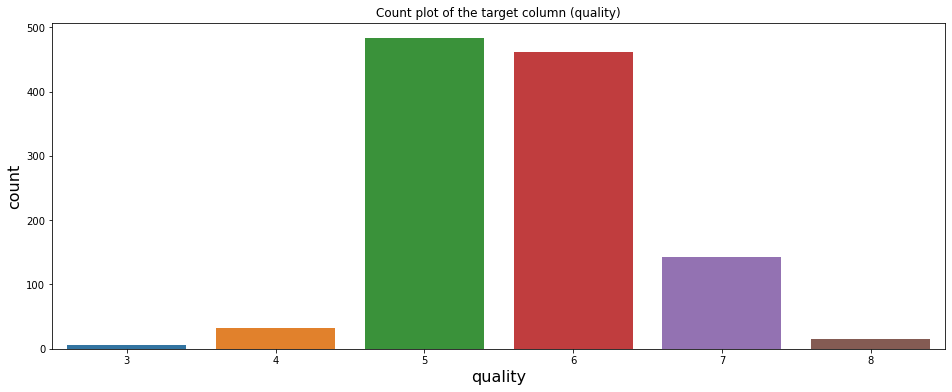

In [7]:
#Checking the distripution of the target column (quality)
plt.figure(figsize=(16,6))
sns.countplot(x=wine_df['quality'])
plt.title('Count plot of the target column (quality)')
plt.xlabel('quality',fontsize=16,c='k')
plt.ylabel('count',fontsize=16,c='k')
plt.show()

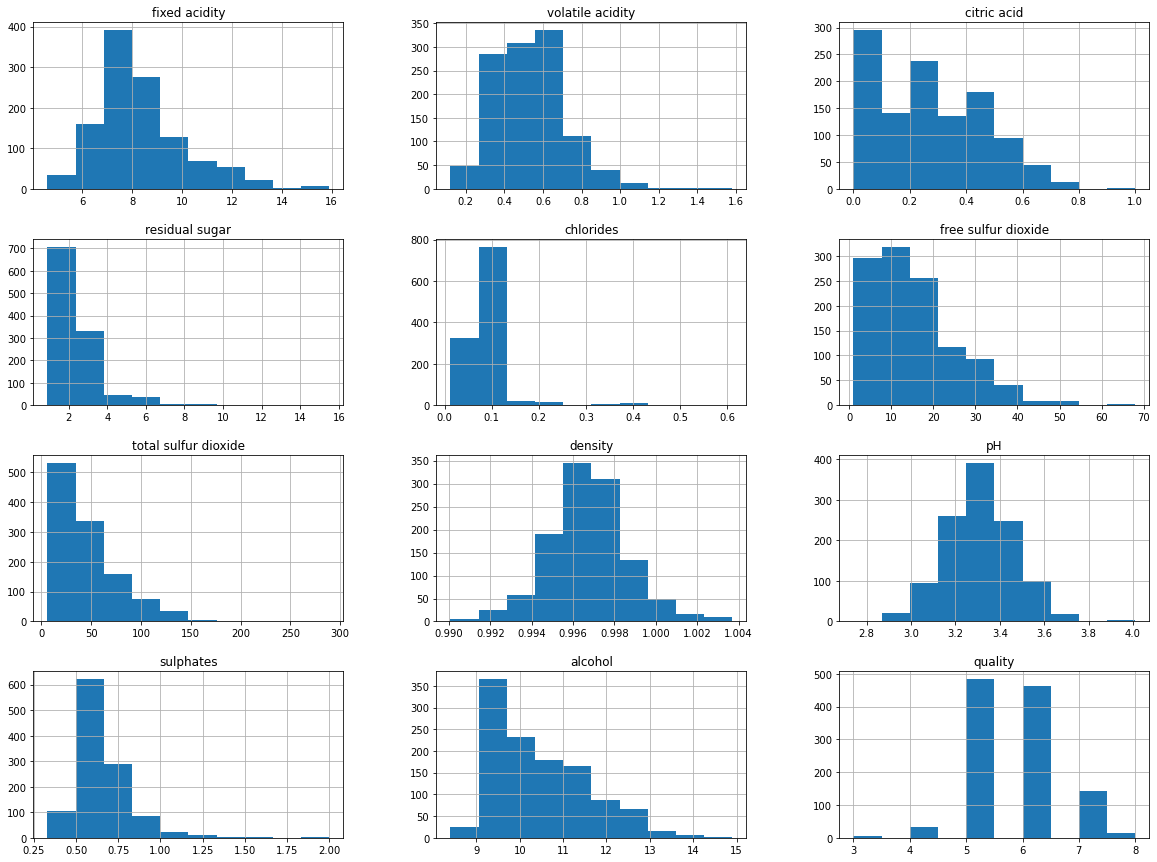

In [8]:
#histogram distripution of numerical features in the dataset
wine_df.hist(figsize=(20,15))
plt.show()

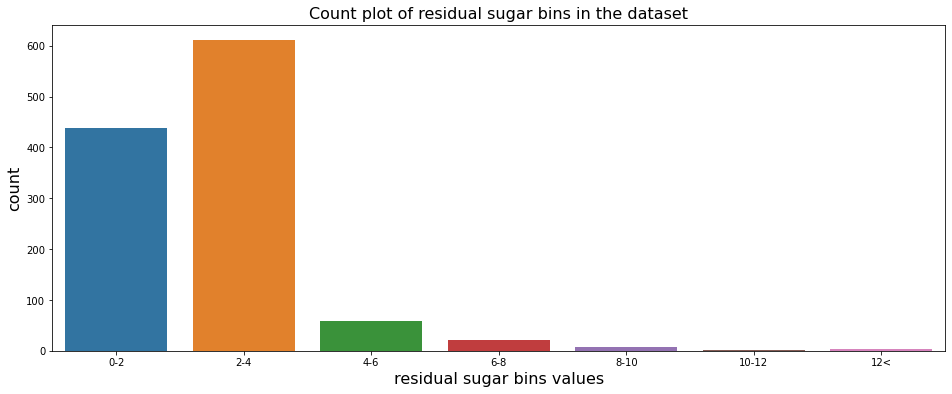

In [9]:
#cutting the numerical feature (residual sugar) into categorical one 
residual_sugar_bins = pd.cut(x=wine_df['residual sugar'],bins=[-np.inf,2,4,6,8,10,12,np.inf],
                            labels=['0-2', '2-4', '4-6', '6-8','8-10','10-12','12<'])

#count plot for the above chunks
plt.figure(figsize=(16,6))
sns.countplot(x=residual_sugar_bins)
plt.title('Count plot of residual sugar bins in the dataset',fontsize=16,c='k')
plt.xlabel('residual sugar bins values',fontsize=16,c='k')
plt.ylabel('count',fontsize=16,c='k')
plt.show()

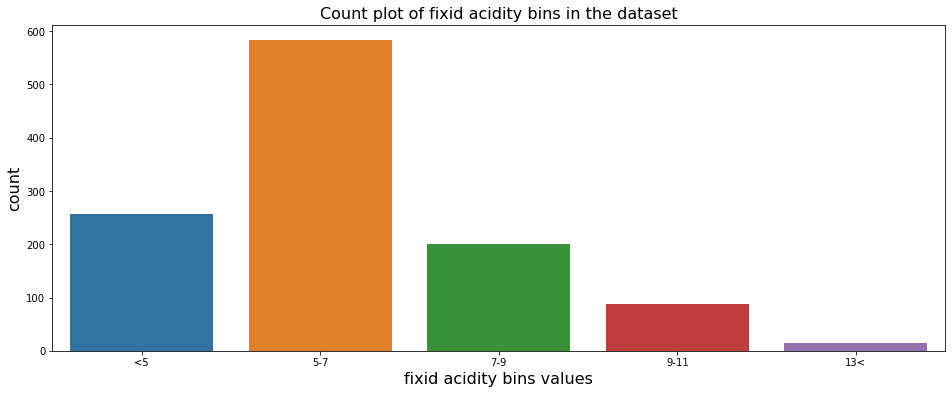

In [10]:
#lets try the same approach for fixid acidity feature
fixid_acidity_bins = pd.cut(x=wine_df['fixed acidity'],bins=[-np.inf,7,9,11,13,np.inf],
                            labels=['<5', '5-7', '7-9', '9-11','13<'])

#count plot for the above chunks
plt.figure(figsize=(16,6))
sns.countplot(x=fixid_acidity_bins)
plt.title('Count plot of fixid acidity bins in the dataset',fontsize=16,c='k')
plt.xlabel('fixid acidity bins values',fontsize=16,c='k')
plt.ylabel('count',fontsize=16,c='k')
plt.show()

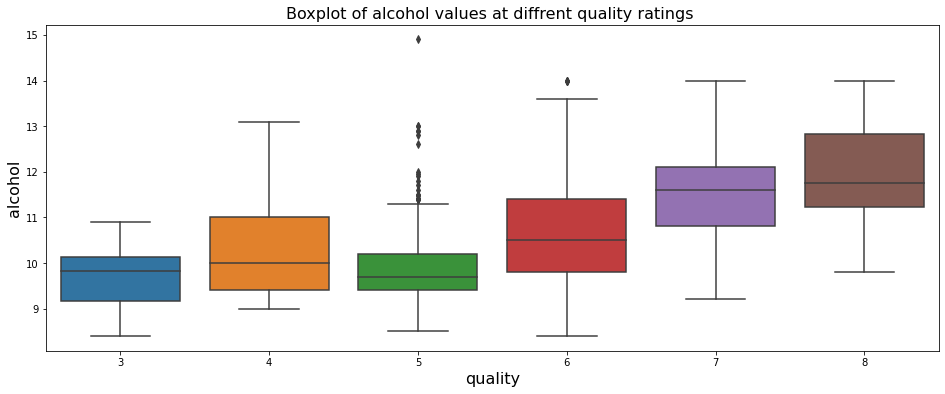

In [11]:
#Boxplot of alcohol values at diffrent quality ratings
plt.figure(figsize=(16,6))
sns.boxplot(y='alcohol',x='quality',data=wine_df)
plt.title('Boxplot of alcohol values at diffrent quality ratings ',fontsize=16,c='k')
plt.xlabel('quality',fontsize=16,c='k')
plt.ylabel('alcohol',fontsize=16,c='k')
plt.show()

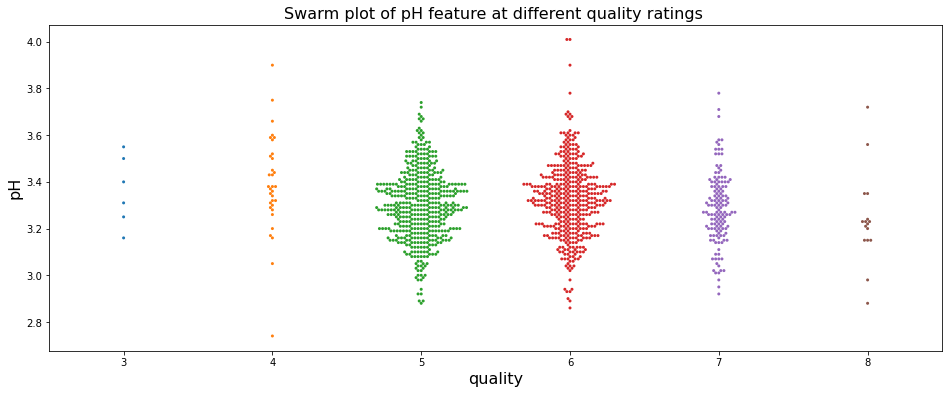

In [12]:
#swarmplot of pH values at diffrent quality ratings
plt.figure(figsize=(16,6))
sns.swarmplot(y='pH',x='quality',data=wine_df,size=3)
plt.title('Swarm plot of pH feature at different quality ratings ',fontsize=16,c='k')
plt.xlabel('quality',fontsize=16,c='k')
plt.ylabel('pH',fontsize=16,c='k')
plt.show()

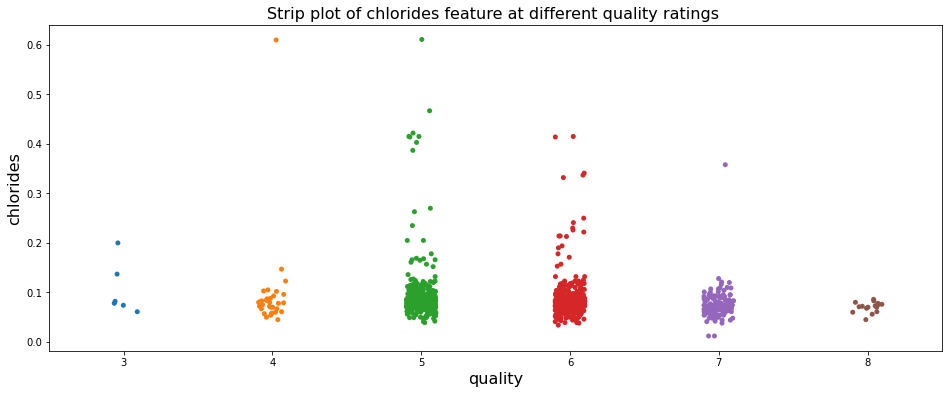

In [13]:
#Stripplot of chlorides values at diffrent quality ratings
plt.figure(figsize=(16,6))
sns.stripplot(y='chlorides',x='quality',data=wine_df)
plt.title('Strip plot of chlorides feature at different quality ratings ',fontsize=16,c='k')
plt.xlabel('quality',fontsize=16,c='k')
plt.ylabel('chlorides',fontsize=16,c='k')
plt.show()

In [14]:
# checking the correlation between the features
wine_df.corr(method='pearson')['quality'].sort_values(ascending=False)

quality                 1.000000
alcohol                 0.484866
sulphates               0.257710
citric acid             0.240821
fixed acidity           0.121970
residual sugar          0.022002
pH                     -0.052453
free sulfur dioxide    -0.063260
chlorides              -0.124085
density                -0.175208
total sulfur dioxide   -0.183339
volatile acidity       -0.407394
Name: quality, dtype: float64

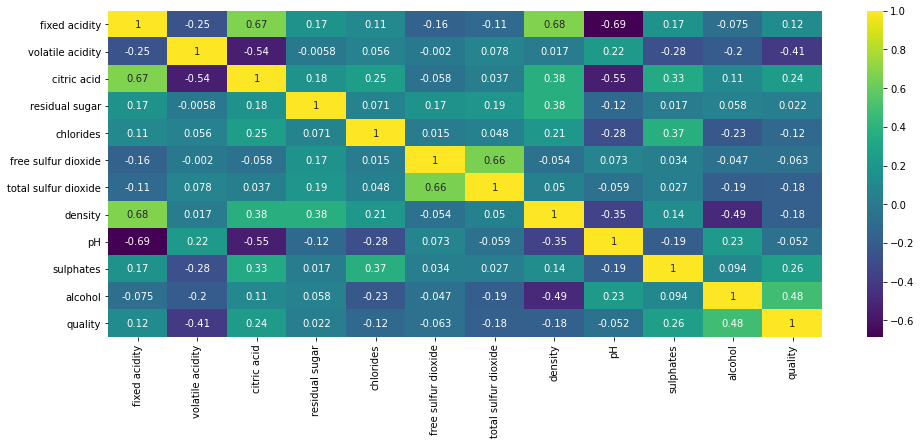

In [15]:
# heatmap for correlation
plt.figure(figsize=(16,6))
sns.heatmap(wine_df.corr(method='pearson'), annot=True, cmap='viridis')
plt.show()

In [16]:
# most corelated value is alcohol and least is volatile acidity

In [17]:
def add_features(df):
    # Ideas from the discussions
    # some work, some don't. At your own risk...
    
    df['mso2'] = df['free sulfur dioxide']/(1+ 10**(df['pH'] -1.81))
    df['alcohol_pH'] = df['alcohol'] * df['pH']

    df['alcohol_residual_sugar'] = df['alcohol'] * df['residual sugar']

    df['pH_residual_sugar'] = df['pH'] * df['residual sugar']

    df['alcohol_citric_acid'] = df['alcohol'] * df['citric acid']

    df['total_acid'] = df['fixed acidity'] + df['volatile acidity'] + df['citric acid']
    df['acid/density'] = df['total_acid']  / df['density']
    df['alcohol_density'] = df['alcohol']  * df['density']
    df['sulphate/density'] = df['sulphates']  / df['density']
    df['sulphates/acid'] = df['sulphates'] / df['volatile acidity']
    df['sulphates/chlorides'] = df['sulphates'] / df['chlorides']
    df['sulphates/alcohol'] = df['sulphates'] / df['alcohol']
    df['acidity_ratio'] = df['fixed acidity'] / df['volatile acidity']
    df['sugar_to_chlorides'] = df['residual sugar'] / df['chlorides']
    df['alcohol_to_density'] = df['alcohol'] / df['density']
    # Create interaction features between alcohol content and volatile acidity
    df['alcohol_volatile_acidity'] = df['alcohol'] * df['volatile acidity']
    return df


In [18]:
wine_df = add_features(wine_df)
wine_df.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,...,acid/density,alcohol_density,sulphate/density,sulphates/acid,sulphates/chlorides,sulphates/alcohol,acidity_ratio,sugar_to_chlorides,alcohol_to_density,alcohol_volatile_acidity
Id,,,,,,,,,,,,,,,,,,,,,
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,...,8.117859,9.37932,0.561235,0.800000,7.368421,0.059574,10.571429,25.000000,9.420726,6.580
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,...,8.707865,9.76864,0.682183,0.772727,6.938776,0.069388,8.863636,26.530612,9.831461,8.624
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,...,8.625878,9.77060,0.651956,0.855263,7.065217,0.066327,10.263158,25.000000,9.829488,7.448
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,...,12.064128,9.78040,0.581162,2.071429,7.733333,0.059184,40.000000,25.333333,9.819639,2.744
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,...,8.117859,9.37932,0.561235,0.800000,7.368421,0.059574,10.571429,25.000000,9.420726,6.580


In [19]:
#chlecking the correlation again
wine_df.corr(method='pearson')['quality'].sort_values(ascending=False)

quality                     1.000000
alcohol_density             0.486064
alcohol                     0.484866
alcohol_to_density          0.483552
sulphates/acid              0.403726
alcohol_pH                  0.382603
sulphates/chlorides         0.362292
acidity_ratio               0.355357
alcohol_citric_acid         0.309092
sulphate/density            0.259448
sulphates                   0.257710
citric acid                 0.240821
sugar_to_chlorides          0.127690
fixed acidity               0.121970
alcohol_residual_sugar      0.118561
acid/density                0.103896
total_acid                  0.101720
sulphates/alcohol           0.061614
residual sugar              0.022002
pH_residual_sugar           0.015874
pH                         -0.052453
mso2                       -0.055646
free sulfur dioxide        -0.063260
chlorides                  -0.124085
density                    -0.175208
total sulfur dioxide       -0.183339
alcohol_volatile_acidity   -0.274118
v

In [20]:
# # getting the features and the target 
X = wine_df.drop(axis = 1, columns='quality')
y = wine_df.pop('quality')

In [21]:
y.value_counts()

5    483
6    462
7    143
4     33
8     16
3      6
Name: quality, dtype: int64

In [22]:
from imblearn.over_sampling import SMOTENC
from imblearn.over_sampling import BorderlineSMOTE

In [23]:
#upsampling the data to balance the classes
bm = BorderlineSMOTE()
X, y = bm.fit_resample(X, y)

In [24]:
y.value_counts()

4    483
6    483
8    483
3    483
5    483
7    483
Name: quality, dtype: int64

In [26]:
from sklearn.model_selection import train_test_split

In [27]:
#splitting the data into train and validation set
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2)

In [29]:
from sklearn.preprocessing import StandardScaler

In [30]:
## using StandardScaler for each Feature to be (mean=0, std=1)
scaler = StandardScaler()
scaler.fit(X_train)
#scaling the train data
X_train = pd.DataFrame(columns=X.columns,data = scaler.transform(X_train),index= X_train.index)
X_test = pd.DataFrame(columns=X.columns,data=scaler.transform(X_test),index= X_test.index)

Building models

Linear Regression

In [32]:
from sklearn.linear_model import LinearRegression

In [33]:
#First we will try simple Linear Regression model
lin_reg = LinearRegression()
lin_reg.fit(X_train, y_train)

LinearRegression()

In [35]:
y_lin = lin_reg.predict(X_test)
y_lin = np.round(y_lin,decimals=0).astype(int) 
df_y_lin = pd.DataFrame({'Id':X_test.index,'quality':y_lin})
df_y_lin.to_csv('y_lin.csv',index=False)
df_y_lin['quality'].value_counts()

7    131
5    114
4     96
6     96
3     85
8     54
2      3
9      1
Name: quality, dtype: int64

In [36]:
y_pred = lin_reg.predict(X_train)

In [37]:
y_test_pred = lin_reg.predict(X_test)

In [39]:
from sklearn import metrics

In [41]:
model_acc = metrics.r2_score(y_test, y_test_pred)
print("model accuracy is :",model_acc*100,'%')

model accuracy is : 80.89667960631768 %
